# Task 2: Part 2

# Visualizing fire scars through false color

Author: Rachel Swick

Github Link: https://github.com/rfswick/eds220-hwk4.git

## Purpose

To create a false color image of the 2017 Thomas Fire in Santa Barbara County.

## Highlights

Major steps include understanding the landsat raster data, creating true and false color images of Santa Barbara County using landsat data, and creating a false color image map of the Thomas Fire.

## Dataset Description

Historic California Fires GeoDatabase: This dataset includes information about all recorded wildifires within the state of California that, according to CalFire, burn "≥10 acres timber, ≥50 acres brush, ≥300 acres grass, damages or destroys three or more structures or does $300,000 worth of damage, or results in loss of life.". Accessed: November 21, 2024

Landsat Data: A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. Accessed: November 21, 2024

## References

Historical Fire Perimeters. CalFire. Updated April 2023. https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters 

Landsat Data: Microsoft Open Source, Matt McFarland, Rob Emanuele, Dan Morris, & Tom Augspurger. (2022). microsoft/PlanetaryComputer: October 2022 (2022.10.28). Zenodo. https://doi.org/10.5281/zenodo.7261897


## 1. Import Libraries

In [1]:
# Load libraries
import os 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr

## 2. Load Data

In [2]:
# Load Thomas Fire boundary data
thomas_fire = gpd.read_file(os.path.join('data', 'thomas_fire.shp'))

# Load landsat data
landsat = rioxr.open_rasterio(os.path.join('data', 'landsat8-2018-01-26-sb-simplified.nc'))

## 3. Data Exploration

Take a look at the data to understand its properties.

In [3]:
# Display landsat contents
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
# Display the variables in the xarray.Dataset
print('Variables: ', landsat.data_vars)

Variables:  Data variables:
    red      (band, y, x) float64 ...
    green    (band, y, x) float64 ...
    blue     (band, y, x) float64 ...
    nir08    (band, y, x) float64 ...
    swir22   (band, y, x) float64 ...


In [5]:
# Display the coordinates in the xarray.Dataset
landsat.coords

Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [6]:
# Display the dimensions of the xarray.Dataset
print("Sizes of dimensions:", dict(landsat.sizes))

Sizes of dimensions: {'y': 731, 'x': 870, 'band': 1}


## 4. Data Exploration Summary

The landsat data has three dimensions (x, y, band), and five variables (red, green, blue, nir08, swir22). The band dimension contains no information and is making the dataset needlessly three dimensional.

## 5. Cleaning

The `landsat` data contains an extra band making the data 3-dimensional when that is not necessary. Remove the band to make the data 2-dimensional and easier to work with.

In [7]:
# Original dimensions and coordinates
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870, 'band': 1}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0


In [8]:
# Remove band dimension
# Remove coordinates associated to band
landsat = landsat.squeeze()
landsat = landsat.drop_vars('band')
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


## 6. True Color Image

Create a true color image of Santa Barbara County. This means creating a map from the visible bands of light.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


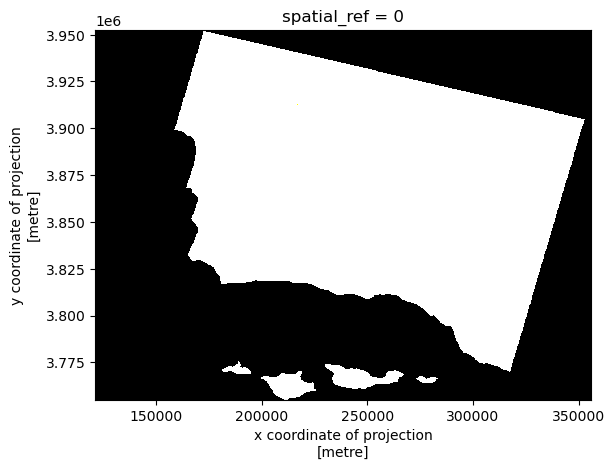

In [9]:
# Create a true color (RGB) image of Santa Barbara County
# Select the "red", "green", and "blue" variables
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

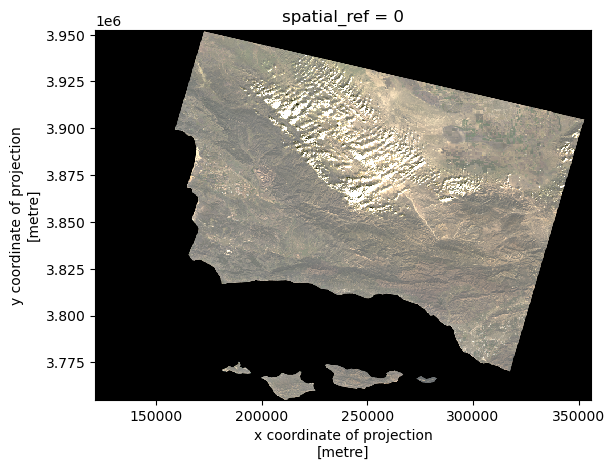

In [10]:
# Create a true color (RGB) image of Santa Barbara County
# Set the `robust` parameter to `True`
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

### Compare Both True Color Images

The cloud RGB values are outliers compared to the values of the rest of the image. This causes the rest of the values to be squished when plotting which results in not being able to see anything in the resulting image. The `robust` parameter pulls weight away from these outliers, allowing the rest of the image to scale properly.

## 7. False Color Image

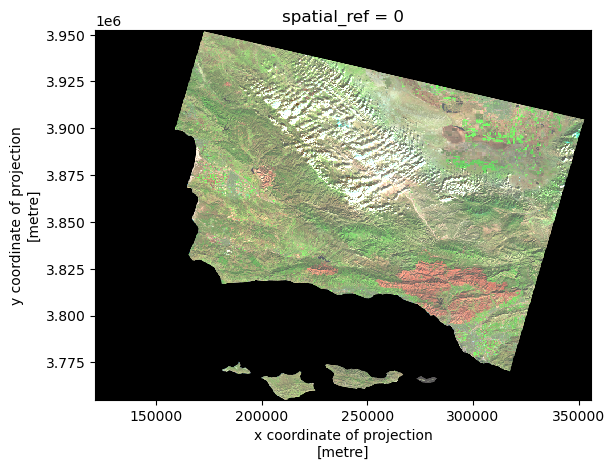

In [11]:
# Create a false color image of Santa Barbara County
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

## 8. False Color Image Map of Thomas Fire

In [12]:
# Confirm the CRS of the data match
if thomas_fire.crs == landsat.rio.crs:
    print("The CRS match.")
else:
    thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
    print("The CRS match.")
    
assert thomas_fire.crs == landsat.rio.crs

The CRS match.


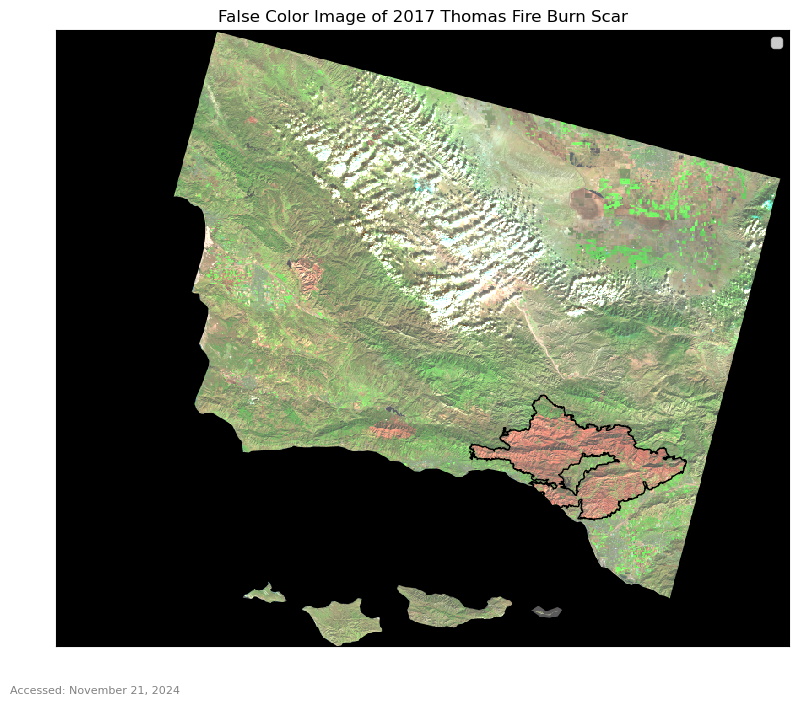

In [13]:
# Plot
fig, ax = plt.subplots(figsize=(10, 8))  

# Add landsat data
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax=ax,
                                                           robust=True)

# Add Thomas Fire Perimeter
thomas_fire.plot(ax=ax,
                 facecolor='none',
                 edgecolor='black',
                 legend=True)

# Add legend label
label = ax.set_label("Thomas Fire Perimeter")
                   
# Add legend 
ax.legend(thomas_fire, handles=label, loc='upper right')

# Add title
ax.set_title("False Color Image of 2017 Thomas Fire Burn Scar")  

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("") 

# Add credits
plt.figtext(0.1, 0.05, 
            "Accessed: November 21, 2024", 
            fontsize=8, 
            color="grey")

plt.show()

The false color image above shows the burn scar of the 2017 Thomas Fire in Santa Barbara County. The purpose of a false color image is to assign bands of light not visible to the human eye to the visible spectrum, where we can create an image that allows a burn scar to stand out amongst surrounding vegetation. NIR is an excellent way to map vegetation because healthy vegeation tends to reflect higher levels of NIR bands. You can see the difference between healthy and, in this case, burned vegation by looking at where there are high and low levels of NIR band reflectance. 